/Users/imax/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-30 19:56:21,789 - INFO - Max length across specified columns: 4096
2024-10-30 19:56:21,789 - INFO - ['NQ TRUE answers llama3.1', 'correct_answers_llama3.1', 'factual_inaccuracy_llama3.1', 'needle_in_haystack_llama3.1']
2024-10-30 19:56:21,790 - INFO - Padding applied. Reduced embeddings shape: (20, 4)


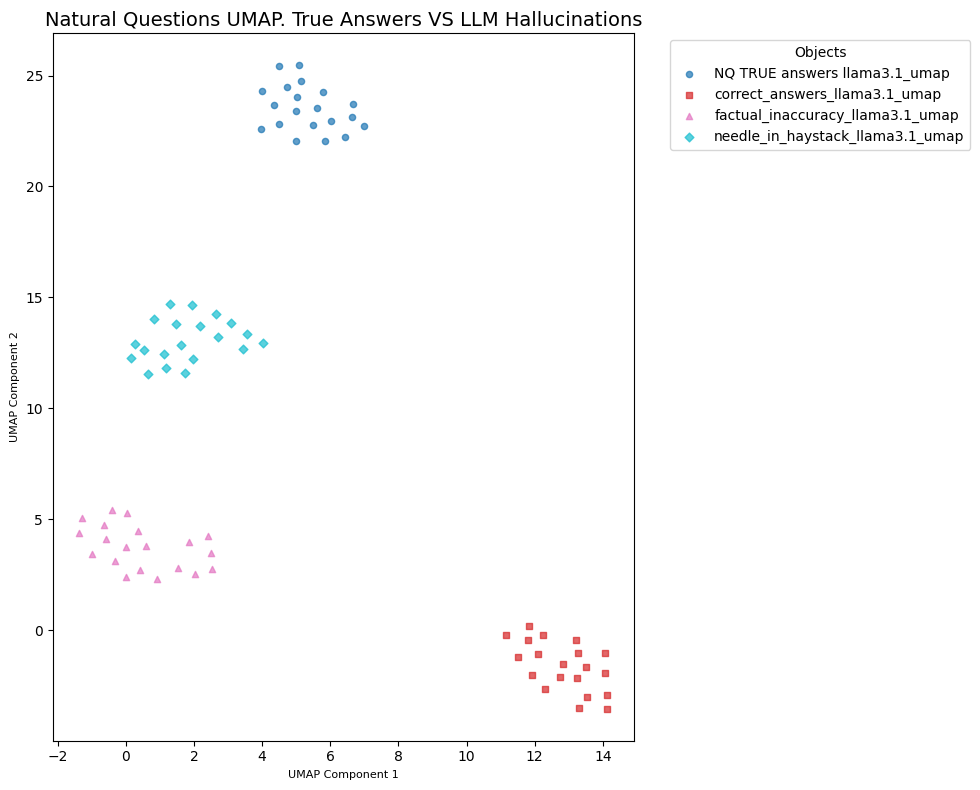

In [1]:
from src.services.embedding_visualizer_service import EmbeddingVisualizer
import pandas as pd     

# Read LLM responses datasets 
true_answers = pd.read_csv('./data/llm_responses/NQ-llm-true-answers_llama3.1.csv')
correct_answers = pd.read_csv('./data/llm_responses/NQ-llm-correct_answers_llama3.1.csv')
factual_inaccuracy = pd.read_csv('./data/llm_responses/NQ-llm-factual_inaccuracy_llama3.1.csv')
needle_in_haystack = pd.read_csv('./data/llm_responses/NQ-llm-needle_in_haystack_llama3.1.csv')

# Rename columns and concatenate datasets, keeping only the required columns
df_combined = pd.concat([
    true_answers.rename(columns={'true_answer_embedding_llama3.1': 'NQ TRUE answers llama3.1'})[['NQ TRUE answers llama3.1']],
    correct_answers.rename(columns={'embedding_llama3.1': 'correct_answers_llama3.1'})[['correct_answers_llama3.1']],
    factual_inaccuracy.rename(columns={'embedding_llama3.1': 'factual_inaccuracy_llama3.1'})[['factual_inaccuracy_llama3.1']],
    needle_in_haystack.rename(columns={'embedding_llama3.1': 'needle_in_haystack_llama3.1'})[['needle_in_haystack_llama3.1']]
], axis=1)

# Display the combined DataFrame
# print(df_combined)

vis = EmbeddingVisualizer(df=df_combined)
vis.convert_columns_to_float_arrays()
vis.process_embeddings_padding()
df_umap = vis.apply_umap(n_components=2)
vis.plot_umap_2d(df=df_umap, title="Natural Questions UMAP. True Answers VS LLM Hallucinations", save_path='./results_imgs/umap_2d.png')

2024-10-30 19:56:30,487 - INFO - Max length across specified columns: 4096
2024-10-30 19:56:30,491 - INFO - ['NQ TRUE answers llama3.1', 'correct_answers_llama3.1', 'factual_inaccuracy_llama3.1', 'needle_in_haystack_llama3.1']
2024-10-30 19:56:30,500 - INFO - Padding applied. Reduced embeddings shape: (20, 4)


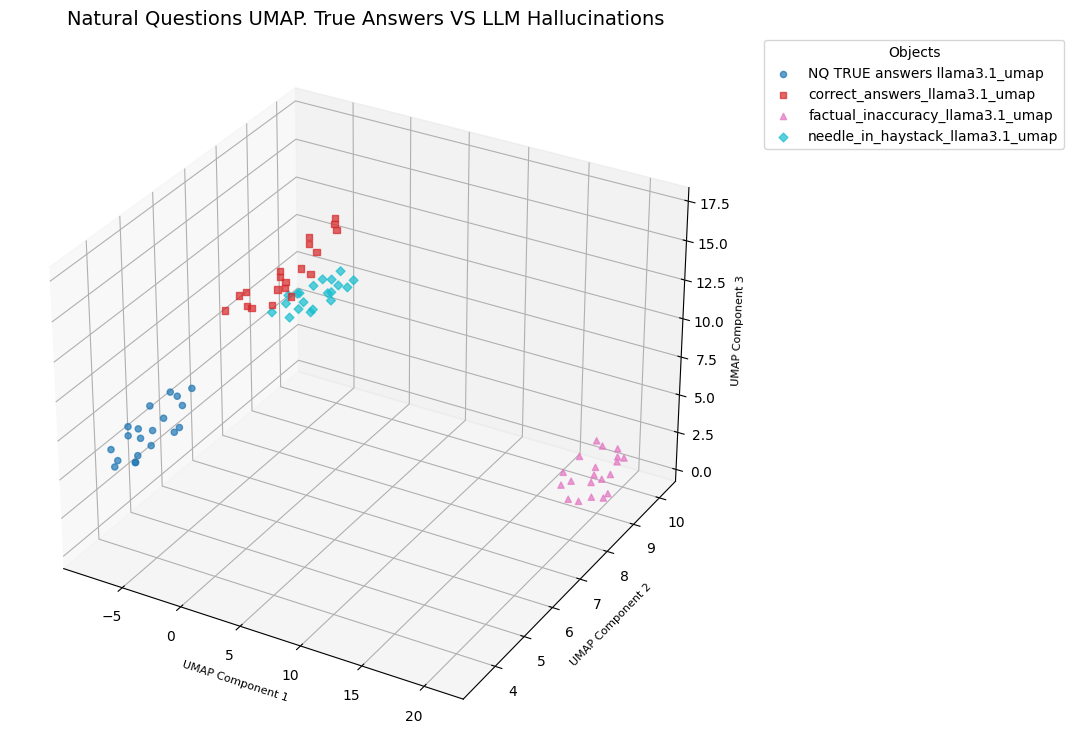

In [2]:
vis = EmbeddingVisualizer(df=df_combined)
vis.convert_columns_to_float_arrays()
vis.process_embeddings_padding()
df_umap = vis.apply_umap(n_components=3)
vis.plot_umap_3d(df=df_umap, title="Natural Questions UMAP. True Answers VS LLM Hallucinations", save_path='./results_imgs/umap_3d.png')

2024-10-30 19:56:51,253 - INFO - Max length across specified columns: 4096
2024-10-30 19:56:51,253 - INFO - ['NQ TRUE answers llama3.1', 'correct_answers_llama3.1', 'factual_inaccuracy_llama3.1', 'needle_in_haystack_llama3.1']
2024-10-30 19:56:51,255 - INFO - Padding applied. Reduced embeddings shape: (20, 4)


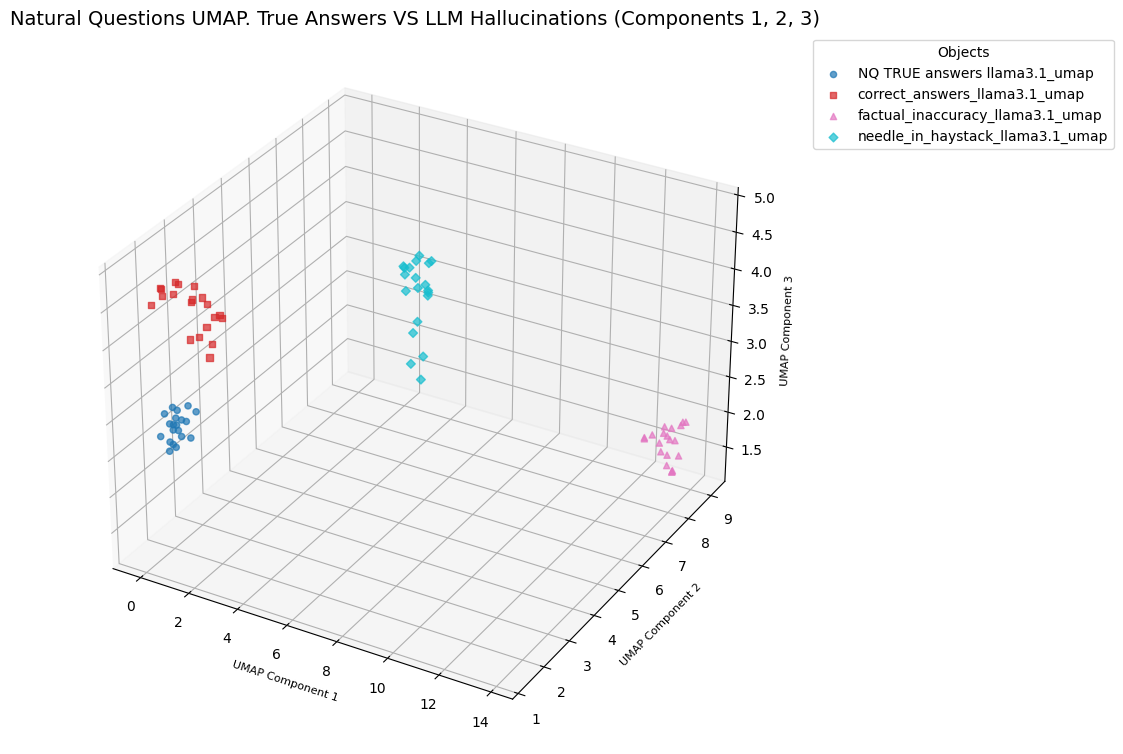

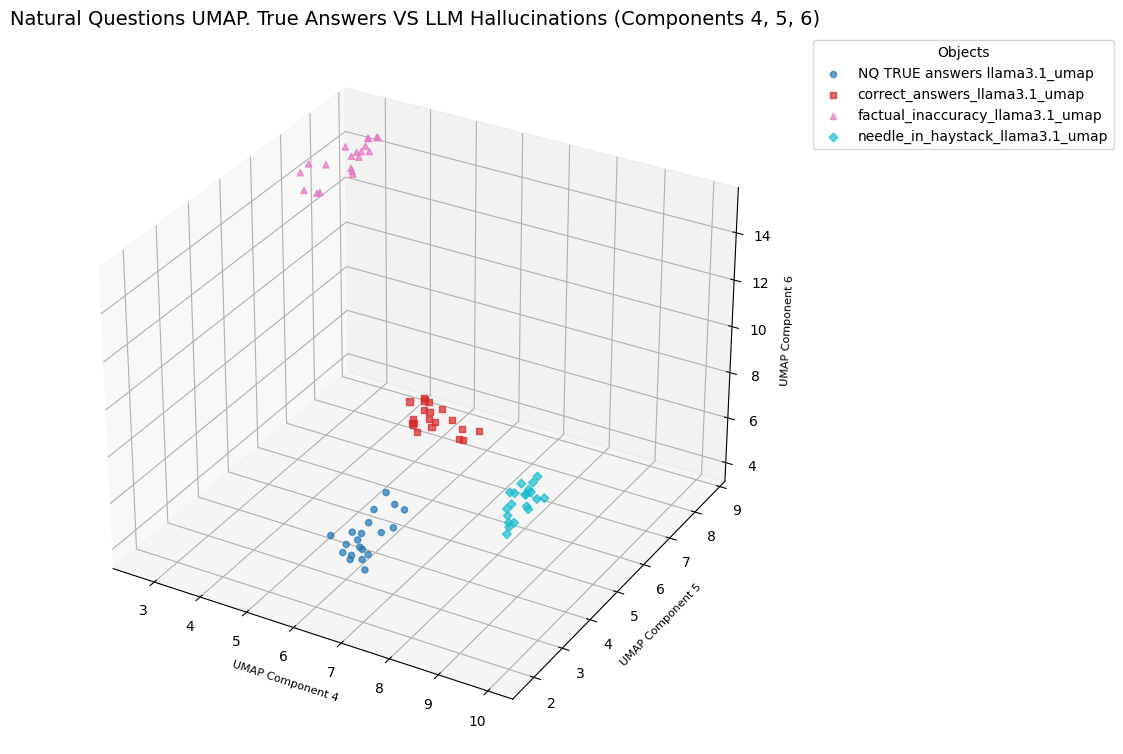

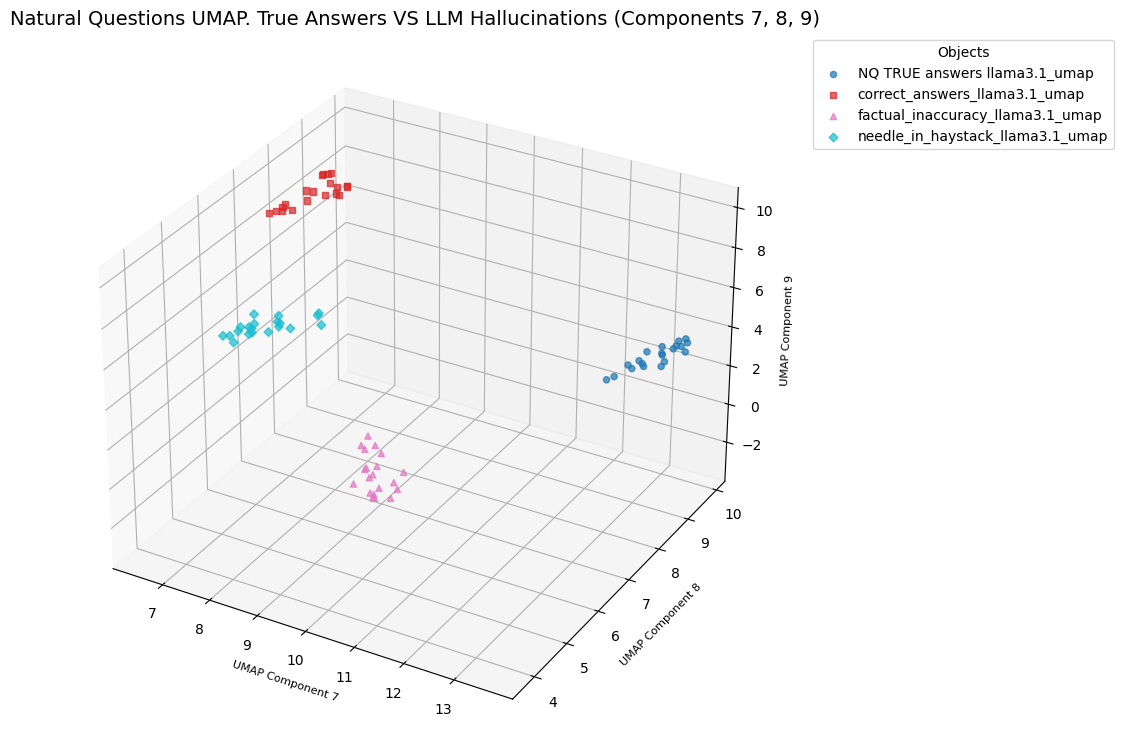

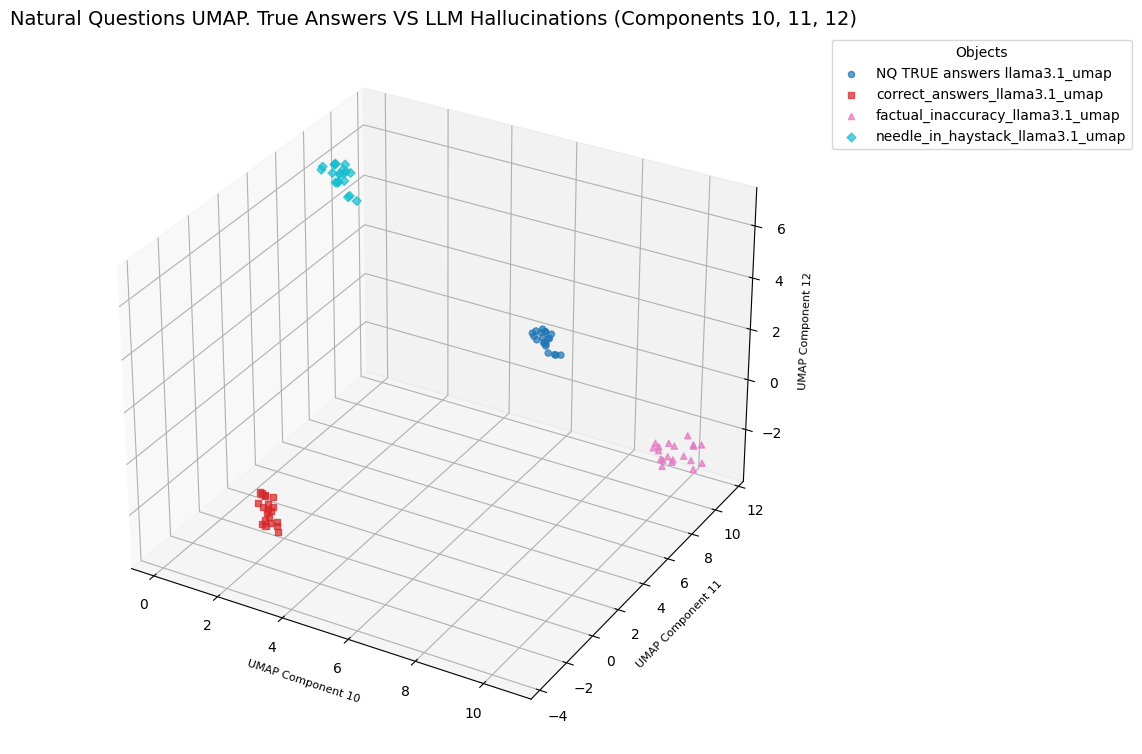

In [3]:
vis = EmbeddingVisualizer(df=df_combined)
vis.convert_columns_to_float_arrays()
vis.process_embeddings_padding()
df_umap = vis.apply_umap(n_components=12)
vis.plot_umap_12d_4x3d(df=df_umap, title="Natural Questions UMAP. True Answers VS LLM Hallucinations", save_path='./results_imgs/umap_12d_4x3d.png')